In [1]:
import numpy as np
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import pynbody.plot as pp
import pickle
import pandas as pd
import pynbody.plot.sph as sph

In [2]:
from Star import *

In [3]:
from Load import *

In [30]:
from bulk import *

In [43]:
a = 239.55
b = 188.85
c = 144.38
d = 127.47
R1Rvir = 86.45

In [5]:
#Vc == ((Gravitational constant * Halo Mass)/Rvir)**(1/2)
G = 4.302*1e-3           #in pc/Msol(km/s)**2
h = 0.6776942783267969          #halo.properties['h']
Rvir = data['Rvir']*1000*h
V_c = (G* data['mass']/Rvir)**(1/2)     #km/s

In [6]:
Rvir2 = data['Rvir'][data['sSFR']<1e-11]*1000*h
Vel = (G* data['mass'][data['sSFR']<1e-11]/Rvir2)**(1/2)     #km/s


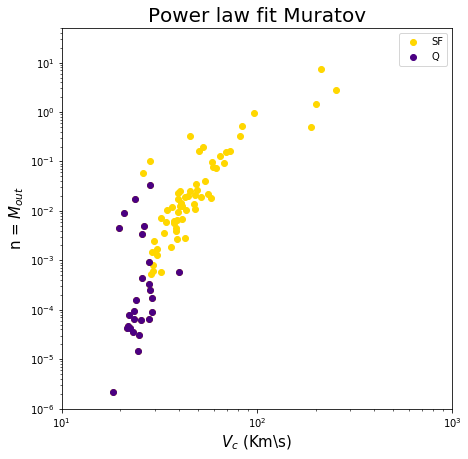

In [5]:
#Plot N value vs Vc

plt.figure(figsize=(7,7))

plt.scatter(V_c, data['G_outflow_2.5'], c='gold', label='SF')
plt.scatter(Vel, data['G_outflow_2.5'][data['sSFR']<1e-11], c='indigo', label='Q')

plt.loglog()
plt.xlim(10, 1e3)
plt.ylim(1e-6, 50)

plt.legend()
plt.xlabel(r'$V_{c}$ (Km\s)', size=15)
plt.ylabel(r'n = $M_{out}$', size=15)
plt.title('Power law fit Muratov', size=20)
plt.savefig('b5')

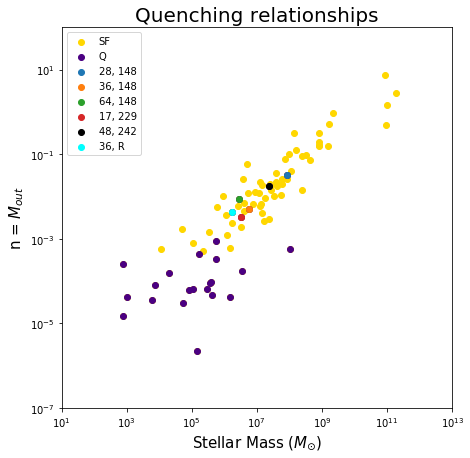

In [26]:
plt.figure(figsize=(7,7))

plt.scatter(data['M_star'], data['G_outflow_2.5'], c='gold', label='SF')
plt.scatter(data['M_star'][data['sSFR']<1e-11], data['G_outflow_2.5'][data['sSFR']<1e-11], c='indigo', label='Q')
plt.scatter(data1['M_star'][data1['haloid']==28], data1['G_outflow_2.5'][data1['haloid']==28], label='28, 148')
plt.scatter(data1['M_star'][data1['haloid']==36], data1['G_outflow_2.5'][data1['haloid']==36], label='36, 148')
plt.scatter(data1['M_star'][data1['haloid']==64], data1['G_outflow_2.5'][data1['haloid']==64], label='64, 148')
plt.scatter(data2['M_star'][data2['haloid']==17], data2['G_outflow_2.5'][data2['haloid']==17], label='17, 229')
plt.scatter(data3['M_star'][data3['haloid']==48], data3['G_outflow_2.5'][data3['haloid']==48], c='black', label='48, 242')
plt.scatter(Rogue['M_star'][Rogue['haloid']==36], Rogue['G_outflow_2.5'][Rogue['haloid']==36], c='cyan', label='36, R')

plt.loglog()
plt.ylim(1e-7, 100)
plt.xlim(1e1, 1e13)

plt.legend()
plt.xlabel(r'Stellar Mass ($M_{\odot}$)', size=15)
plt.ylabel(r'n = $M_{out}$', size=15)
plt.title('Quenching relationships', size=20)
plt.savefig('c')

Text(0.5, 1.0, 'Outlier Distance')

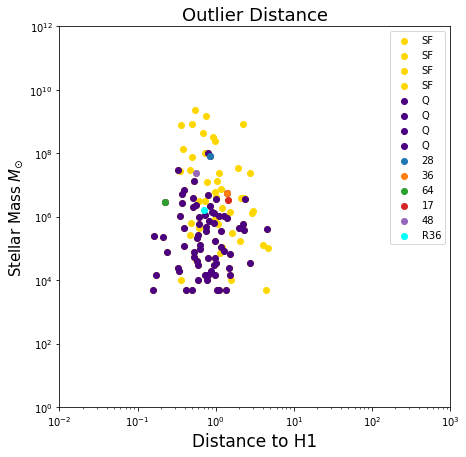

In [44]:
plt.figure(figsize=(7,7))

plt.scatter(data1['h1dist']/a, data1['M_star'], label='SF', c='gold')
plt.scatter(data2['h1dist']/b, data2['M_star'], label='SF', c='gold')
plt.scatter(data3['h1dist']/c, data3['M_star'], label='SF', c='gold')
plt.scatter(data4['h1dist']/d, data4['M_star'], label='SF', c='gold')
plt.scatter(data1['h1dist'][data1['sSFR']<1e-11]/a, data1['M_star'][data1['sSFR']<1e-11], label='Q', c='indigo')
plt.scatter(data2['h1dist'][data1['sSFR']<1e-11]/b, data2['M_star'][data1['sSFR']<1e-11], label='Q', c='indigo')
plt.scatter(data3['h1dist'][data1['sSFR']<1e-11]/c, data3['M_star'][data1['sSFR']<1e-11], label='Q', c='indigo')
plt.scatter(data4['h1dist'][data1['sSFR']<1e-11]/d, data4['M_star'][data1['sSFR']<1e-11], label='Q', c='indigo')
plt.scatter(data1['h1dist'][data1['haloid']==28]/a, data1['M_star'][data1['haloid']==28], label='28')
plt.scatter(data1['h1dist'][data1['haloid']==36]/a, data1['M_star'][data1['haloid']==36], label='36')
plt.scatter(data1['h1dist'][data1['haloid']==64]/a, data1['M_star'][data1['haloid']==64], label='64')
plt.scatter(data2['h1dist'][data2['haloid']==17]/b, data2['M_star'][data2['haloid']==17], label='17')
plt.scatter(data3['h1dist'][data3['haloid']==48]/c, data3['M_star'][data3['haloid']==48], label='48')
plt.scatter(Rogue['h1dist'][Rogue['haloid']==36]/R1Rvir, Rogue['M_star'][Rogue['haloid']==36], label='R36', c='cyan')

plt.legend()

plt.loglog()
plt.ylim(1, 1e12)
plt.xlim(1e-2, 1e3)

plt.ylabel('Stellar Mass $M_{\odot}$', size=15)
plt.xlabel('Distance to H1', size=17)
plt.title('Outlier Distance', size=18)

This plot indicates that there is not relationship between the quenching of these outlying halos and their position relative to the host galaxy, at least not in the current snapshot, we can trace their movement through other snapshots to attempt to confirm. 

Text(0.5, 1.0, 'Outlier Distance')

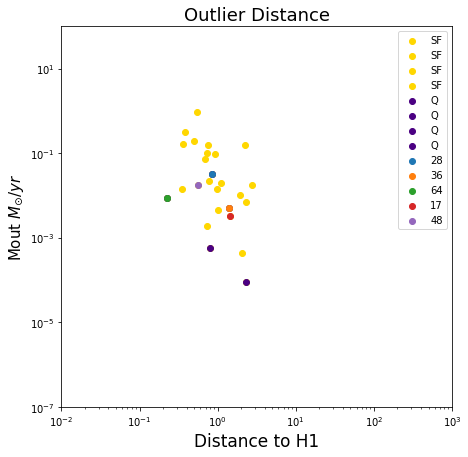

In [37]:
plt.figure(figsize=(7,7))

plt.scatter(data1['h1dist']/a, data1['G_outflow_2.5'], label='SF', c='gold')
plt.scatter(data2['h1dist']/b, data2['G_outflow_2.5'], label='SF', c='gold')
plt.scatter(data3['h1dist']/c, data3['G_outflow_2.5'], label='SF', c='gold')
plt.scatter(data4['h1dist']/d, data4['G_outflow_2.5'], label='SF', c='gold')
plt.scatter(data1['h1dist'][data1['sSFR']<1e-11]/a, data1['G_outflow_2.5'][data1['sSFR']<1e-11], label='Q', c='indigo')
plt.scatter(data2['h1dist'][data1['sSFR']<1e-11]/b, data2['G_outflow_2.5'][data1['sSFR']<1e-11], label='Q', c='indigo')
plt.scatter(data3['h1dist'][data1['sSFR']<1e-11]/c, data3['G_outflow_2.5'][data1['sSFR']<1e-11], label='Q', c='indigo')
plt.scatter(data4['h1dist'][data1['sSFR']<1e-11]/d, data4['G_outflow_2.5'][data1['sSFR']<1e-11], label='Q', c='indigo')
plt.scatter(data1['h1dist'][data1['haloid']==28]/a, data1['G_outflow_2.5'][data1['haloid']==28], label='28')
plt.scatter(data1['h1dist'][data1['haloid']==36]/a, data1['G_outflow_2.5'][data1['haloid']==36], label='36')
plt.scatter(data1['h1dist'][data1['haloid']==64]/a, data1['G_outflow_2.5'][data1['haloid']==64], label='64')
plt.scatter(data2['h1dist'][data2['haloid']==17]/b, data2['G_outflow_2.5'][data2['haloid']==17], label='17')
plt.scatter(data3['h1dist'][data3['haloid']==48]/c, data3['G_outflow_2.5'][data3['haloid']==48], label='48')

plt.legend()

plt.loglog()
plt.xlim(1e-2, 1e3)
plt.ylim(1e-7, 100)

plt.ylabel('Mout $M_{\odot}/yr$', size=15)
plt.xlabel('Distance to H1', size=17)
plt.title('Outlier Distance', size=18)

Text(0.5, 1.0, 'Outlier Distance')

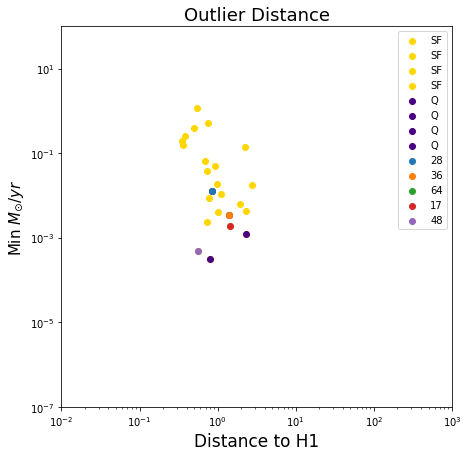

In [51]:
plt.figure(figsize=(7,7))

plt.scatter(data1['h1dist']/a, abs(data1['G_inflow_2.5']), label='SF', c='gold')
plt.scatter(data2['h1dist']/b, abs(data2['G_inflow_2.5']), label='SF', c='gold')
plt.scatter(data3['h1dist']/c, abs(data3['G_inflow_2.5']), label='SF', c='gold')
plt.scatter(data4['h1dist']/d, abs(data4['G_inflow_2.5']), label='SF', c='gold')
plt.scatter(data1['h1dist'][data1['sSFR']<1e-11]/a, abs(data1['G_inflow_2.5'][data1['sSFR']<1e-11]), label='Q', c='indigo')
plt.scatter(data2['h1dist'][data1['sSFR']<1e-11]/b, abs(data2['G_inflow_2.5'][data1['sSFR']<1e-11]), label='Q', c='indigo')
plt.scatter(data3['h1dist'][data1['sSFR']<1e-11]/c, abs(data3['G_inflow_2.5'][data1['sSFR']<1e-11]), label='Q', c='indigo')
plt.scatter(data4['h1dist'][data1['sSFR']<1e-11]/d, abs(data4['G_inflow_2.5'][data1['sSFR']<1e-11]), label='Q', c='indigo')
plt.scatter(data1['h1dist'][data1['haloid']==28]/a, abs(data1['G_inflow_2.5'][data1['haloid']==28]), label='28')
plt.scatter(data1['h1dist'][data1['haloid']==36]/a, abs(data1['G_inflow_2.5'][data1['haloid']==36]), label='36')
plt.scatter(data1['h1dist'][data1['haloid']==64]/a, abs(data1['G_inflow_2.5'][data1['haloid']==64]), label='64')
plt.scatter(data2['h1dist'][data2['haloid']==17]/b, abs(data2['G_inflow_2.5'][data2['haloid']==17]), label='17')
plt.scatter(data3['h1dist'][data3['haloid']==48]/c, abs(data3['G_inflow_2.5'][data3['haloid']==48]), label='48')

plt.legend()

plt.loglog()
plt.xlim(1e-2, 1e3)
plt.ylim(1e-7, 100)

plt.ylabel('Min $M_{\odot}/yr$', size=15)
plt.xlabel('Distance to H1', size=17)
plt.title('Outlier Distance', size=18)

Text(0.5, 1.0, 'Outlier Distance')

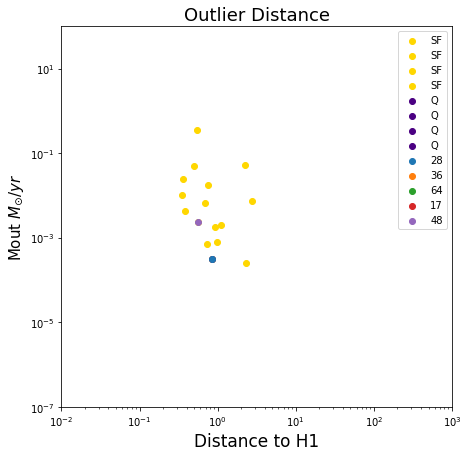

In [54]:
plt.figure(figsize=(7,7))

plt.scatter(data1['h1dist']/a, data1['G_outflow_0'], label='SF', c='gold')
plt.scatter(data2['h1dist']/b, data2['G_outflow_0'], label='SF', c='gold')
plt.scatter(data3['h1dist']/c, data3['G_outflow_0'], label='SF', c='gold')
plt.scatter(data4['h1dist']/d, data4['G_outflow_0'], label='SF', c='gold')
plt.scatter(data1['h1dist'][data1['sSFR']<1e-11]/a, data1['G_outflow_0'][data1['sSFR']<1e-11], label='Q', c='indigo')
plt.scatter(data2['h1dist'][data1['sSFR']<1e-11]/b, data2['G_outflow_0'][data1['sSFR']<1e-11], label='Q', c='indigo')
plt.scatter(data3['h1dist'][data1['sSFR']<1e-11]/c, data3['G_outflow_0'][data1['sSFR']<1e-11], label='Q', c='indigo')
plt.scatter(data4['h1dist'][data1['sSFR']<1e-11]/d, data4['G_outflow_0'][data1['sSFR']<1e-11], label='Q', c='indigo')
plt.scatter(data1['h1dist'][data1['haloid']==28]/a, data1['G_outflow_0'][data1['haloid']==28], label='28')
plt.scatter(data1['h1dist'][data1['haloid']==36]/a, data1['G_outflow_0'][data1['haloid']==36], label='36')
plt.scatter(data1['h1dist'][data1['haloid']==64]/a, data1['G_outflow_0'][data1['haloid']==64], label='64')
plt.scatter(data2['h1dist'][data2['haloid']==17]/b, data2['G_outflow_0'][data2['haloid']==17], label='17')
plt.scatter(data3['h1dist'][data3['haloid']==48]/c, data3['G_outflow_0'][data3['haloid']==48], label='48')

plt.legend()

plt.loglog()
plt.xlim(1e-2, 1e3)
plt.ylim(1e-7, 100)

plt.ylabel('Mout $M_{\odot}/yr$', size=15)
plt.xlabel('Distance to H1', size=17)
plt.title('Outlier Distance', size=18)

Text(0.5, 1.0, 'Outlier Distance')

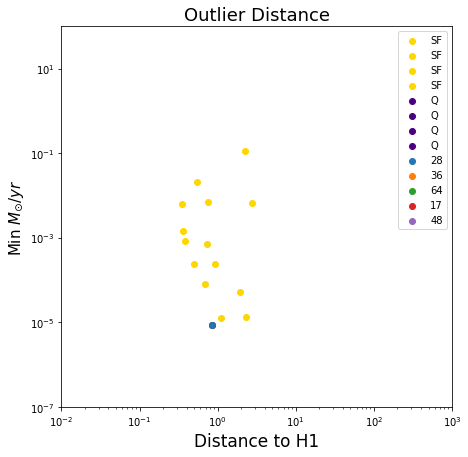

In [53]:
plt.figure(figsize=(7,7))

plt.scatter(data1['h1dist']/a, abs(data1['G_inflow_0']), label='SF', c='gold')
plt.scatter(data2['h1dist']/b, abs(data2['G_inflow_0']), label='SF', c='gold')
plt.scatter(data3['h1dist']/c, abs(data3['G_inflow_0']), label='SF', c='gold')
plt.scatter(data4['h1dist']/d, abs(data4['G_inflow_0']), label='SF', c='gold')
plt.scatter(data1['h1dist'][data1['sSFR']<1e-11]/a, abs(data1['G_inflow_0'][data1['sSFR']<1e-11]), label='Q', c='indigo')
plt.scatter(data2['h1dist'][data1['sSFR']<1e-11]/b, abs(data2['G_inflow_0'][data1['sSFR']<1e-11]), label='Q', c='indigo')
plt.scatter(data3['h1dist'][data1['sSFR']<1e-11]/c, abs(data3['G_inflow_0'][data1['sSFR']<1e-11]), label='Q', c='indigo')
plt.scatter(data4['h1dist'][data1['sSFR']<1e-11]/d, abs(data4['G_inflow_0'][data1['sSFR']<1e-11]), label='Q', c='indigo')
plt.scatter(data1['h1dist'][data1['haloid']==28]/a, abs(data1['G_inflow_0'][data1['haloid']==28]), label='28')
plt.scatter(data1['h1dist'][data1['haloid']==36]/a, abs(data1['G_inflow_0'][data1['haloid']==36]), label='36')
plt.scatter(data1['h1dist'][data1['haloid']==64]/a, abs(data1['G_inflow_0'][data1['haloid']==64]), label='64')
plt.scatter(data2['h1dist'][data2['haloid']==17]/b, abs(data2['G_inflow_0'][data2['haloid']==17]), label='17')
plt.scatter(data3['h1dist'][data3['haloid']==48]/c, abs(data3['G_inflow_0'][data3['haloid']==48]), label='48')

plt.legend()

plt.loglog()
plt.xlim(1e-2, 1e3)
plt.ylim(1e-7, 100)

plt.ylabel('Min $M_{\odot}/yr$', size=15)
plt.xlabel('Distance to H1', size=17)
plt.title('Outlier Distance', size=18)

In [52]:
data1['G_inflow_2.5'][data1['haloid']==64]

25    0.0
Name: G_inflow_2.5, dtype: float64

Evidence that the outliers are experiencing strangulation or RAM stripping, they continue to experience gas outflow, it would appear at elevated rates relative to total size. There isn't a strong correlation with ditance to the host halo, yet we see that the rates of inflowing gas are extremely low (strangulation) indicating that this could be the cause for a lack of star formation. 

Text(0.5, 1.0, 'Outlier Gas Temp')

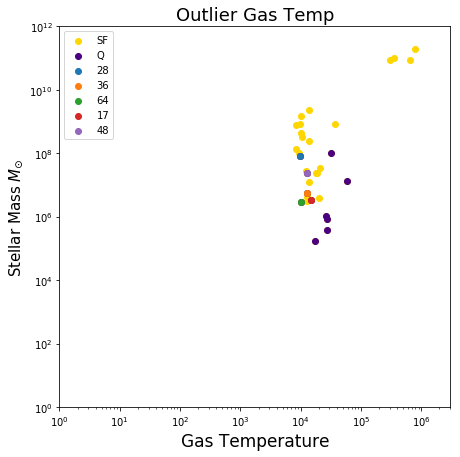

In [38]:
plt.figure(figsize=(7,7))

plt.scatter(MW['g_temp'], MW['M_star'], label='SF', c='gold')
plt.scatter(MW['g_temp'][MW['sSFR']<1e-11], MW['M_star'][MW['sSFR']<1e-11], label='Q', c='indigo')
plt.scatter(data1['g_temp'][data1['haloid']==28], data1['M_star'][data1['haloid']==28], label='28')
plt.scatter(data1['g_temp'][data1['haloid']==36], data1['M_star'][data1['haloid']==36], label='36')
plt.scatter(data1['g_temp'][data1['haloid']==64], data1['M_star'][data1['haloid']==64], label='64')
plt.scatter(data2['g_temp'][data2['haloid']==17], data2['M_star'][data2['haloid']==17], label='17')
plt.scatter(data3['g_temp'][data3['haloid']==48], data3['M_star'][data3['haloid']==48], label='48')

plt.legend()

plt.loglog()
plt.ylim(1, 1e12)
plt.xlim(1, 3e6)

plt.ylabel('Stellar Mass $M_{\odot}$', size=15)
plt.xlabel('Gas Temperature', size=17)
plt.title('Outlier Gas Temp', size=18)

Cold gas can be an indicator of RAM pressure stripping since it only effectively removes hot gas decreasing the overall temperature of the halo over time. 

Text(0.5, 1.0, 'Outlier Gas inflow Temp')

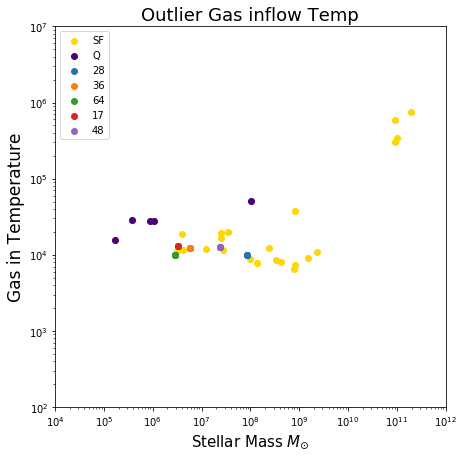

In [48]:
plt.figure(figsize=(7,7))

plt.scatter(MW['M_star'], MW['Gout_T'], label='SF', c='gold')
plt.scatter(MW['M_star'][MW['sSFR']<1e-11], MW['Gout_T'][MW['sSFR']<1e-11], label='Q', c='indigo')

plt.scatter(data1['M_star'][data1['haloid']==28], data1['Gout_T'][data1['haloid']==28], label='28')
plt.scatter(data1['M_star'][data1['haloid']==36], data1['Gout_T'][data1['haloid']==36], label='36')
plt.scatter(data1['M_star'][data1['haloid']==64], data1['Gout_T'][data1['haloid']==64], label='64')
plt.scatter(data2['M_star'][data2['haloid']==17], data2['Gout_T'][data2['haloid']==17], label='17')
plt.scatter(data3['M_star'][data3['haloid']==48], data3['Gout_T'][data3['haloid']==48], label='48')

plt.legend()

plt.loglog()
plt.ylim(1e2, 1e7)
plt.xlim(1e4, 1e12)

plt.xlabel('Stellar Mass $M_{\odot}$', size=15)
plt.ylabel('Gas in Temperature', size=17)
plt.title('Outlier Gas inflow Temp', size=18)

Would like to plot these halos as a position/distance to the host over time which would show their orbital distance from the host halo. Hopefully we would see them travel in really close to the host and then sling shot out again, but in that close tgravel they would have experienced RAM pressure stripping therefore quenching them despite their size and current distance which would explain their status as outliers in the previous graphs. 

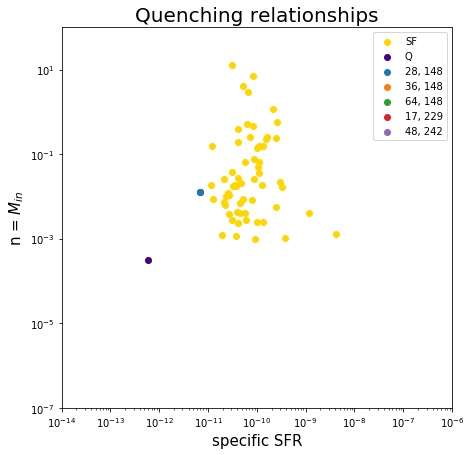

In [62]:
plt.figure(figsize=(7,7))

plt.scatter(data['sSFR'], abs(data['G_inflow_2.5']), c='gold', label='SF')
plt.scatter(data['sSFR'][data['sSFR']<1e-11], abs(data['G_inflow_2.5'][data['sSFR']<1e-11]), c='indigo', label='Q')
plt.scatter(data1['sSFR'][data1['haloid']==28], abs(data1['G_inflow_2.5'][data1['haloid']==28]), label='28, 148')
plt.scatter(data1['sSFR'][data1['haloid']==36], abs(data1['G_inflow_2.5'][data1['haloid']==36]), label='36, 148')
plt.scatter(data1['sSFR'][data1['haloid']==64], abs(data1['G_inflow_2.5'][data1['haloid']==64]), label='64, 148')
plt.scatter(data2['sSFR'][data2['haloid']==17], abs(data2['G_inflow_2.5'][data2['haloid']==17]), label='17, 229')
plt.scatter(data3['sSFR'][data3['haloid']==48], abs(data3['G_inflow_2.5'][data3['haloid']==48]), label='48, 242')

plt.loglog()
plt.ylim(1e-7, 100)
plt.xlim(1e-14, 1e-6)

plt.legend()
plt.xlabel('specific SFR', size=15)
plt.ylabel(r'n = $M_{in}$', size=15)
plt.title('Quenching relationships', size=20)
plt.savefig('c')

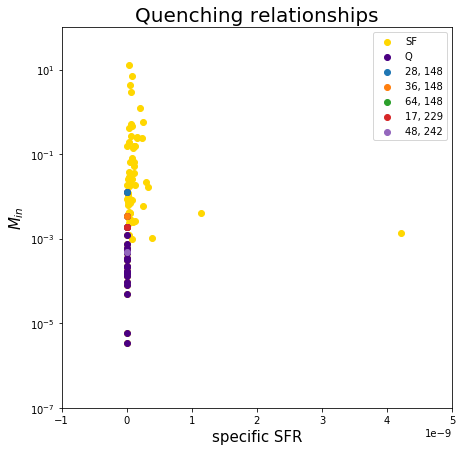

In [45]:
plt.figure(figsize=(7,7))

plt.scatter(data['sSFR'], abs(data['G_inflow_2.5']), c='gold', label='SF')
plt.scatter(data['sSFR'][data['sSFR']<1e-11], abs(data['G_inflow_2.5'][data['sSFR']<1e-11]), c='indigo', label='Q')
plt.scatter(data1['sSFR'][data1['haloid']==28], abs(data1['G_inflow_2.5'][data1['haloid']==28]), label='28, 148')
plt.scatter(data1['sSFR'][data1['haloid']==36], abs(data1['G_inflow_2.5'][data1['haloid']==36]), label='36, 148')
plt.scatter(data1['sSFR'][data1['haloid']==64], abs(data1['G_inflow_2.5'][data1['haloid']==64]), label='64, 148')
plt.scatter(data2['sSFR'][data2['haloid']==17], abs(data2['G_inflow_2.5'][data2['haloid']==17]), label='17, 229')
plt.scatter(data3['sSFR'][data3['haloid']==48], abs(data3['G_inflow_2.5'][data3['haloid']==48]), label='48, 242')

#plt.loglog()
plt.semilogy()
plt.ylim(1e-7, 100)
plt.xlim(-1e-9, 5e-9)

plt.legend()
plt.xlabel('specific SFR', size=15)
plt.ylabel(r'$M_{in}$', size=15)
plt.title('Quenching relationships', size=20)
plt.savefig('c')

In [55]:
halo28 = h1.load_copy(28)
halo28.physical_units()

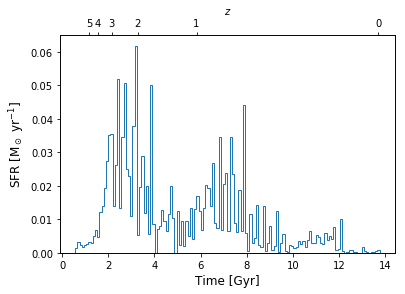

In [56]:
pynbody.plot.stars.sfh(halo28, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.show()

In [25]:
halo36 = h1.load_copy(36)
halo36.physical_units()

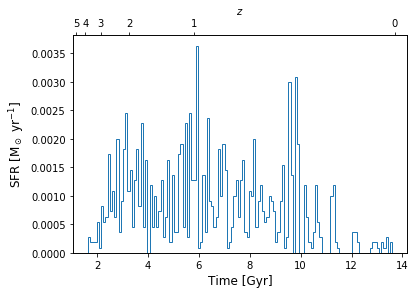

In [31]:
pynbody.plot.stars.sfh(halo36, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.show()

In [26]:
halo64 = h1.load_copy(64)
halo64.physical_units()

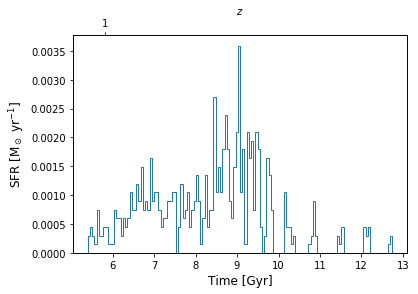

In [32]:
pynbody.plot.stars.sfh(halo64, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.show()

In [27]:
halo17 = h2.load_copy(17)
halo17.physical_units()

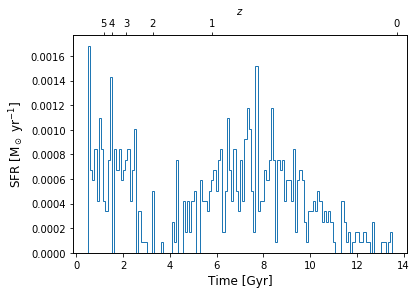

In [33]:
pynbody.plot.stars.sfh(halo17, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.show()

In [43]:
halo46 = h3.load_copy(46)
halo46.physical_units()

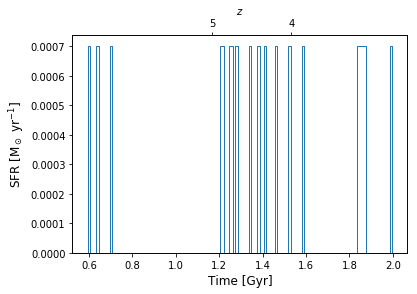

In [44]:
pynbody.plot.stars.sfh(halo46, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.show()

In [ ]:
s1.gas['mass']

In [31]:
h1[9].properties['fMhires']

0.999997

The SFH diagrams can also be used as evidence for strangulation since there appears to be a slow decrease in star formation over a long period of time. This process is more gradual than RAM stripping. 

(55, 65)

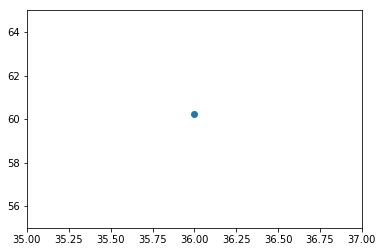

In [37]:
plt.scatter(Rogue['haloid'], distance_to_nearest_halo(Rogue))
plt.xlim(35, 37)
plt.ylim(55, 65)